In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('Advertising.csv', index_col=0)
df.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [35]:
X = df.drop(columns="sales").values
y = df["sales"]

In [39]:
# for linear regression we need to add an intercept
X = np.hstack((np.ones((X.shape[0], 1)), X))

In [58]:
def mse(features, target, params):
    predictions = np.dot(features, params)
    return np.mean((target - predictions) ** 2)

In [59]:
mse(np.array([1,2,3]),np.array([1.2,2.3,3.1]))

TypeError: mse() missing 1 required positional argument: 'params'

In [62]:
def numerical_gradient(cost_function, params, features, target, h=1e-4):
    grad = np.zeros_like(params)
    for x in range(len(params)):
        original_value = params[x]

        # cost at 
        params[x] = original_value + h
        loss_p_h = cost_function(features, target, params)

        # cost at [params[x] - h]
        params[x] = original_value - h
        loss_m_h = cost_function(features, target, params)

        # approx gradient
        grad[x] = (loss_p_h - loss_m_h) / (2 * h)

        # reset parameter value
        params[x] = original_value
    return grad


In [63]:
# def quadratic_cost(params, features, target):
#     predictions = params * (features ** 2)
#     return np.mean((target - predictions) ** 2)
# def quadratic_function(x, a=1, b=0, c=0):
#     return a * x**2 + b * x + c

# def quadratic_derivative(x, a=1, b=0):
#     return 2 * a * x + b

# features = np.array([1, 2, 3])
# target = np.array([1, 4, 9]) 
# params = np.array([1.0])

# numerical_grad = numerical_gradient(quadratic_cost, params, features, target)
# print("Numerical Gradient:", numerical_grad)

In [83]:
def gd(cost_function, init_params, learning_rate, features, target, max_iterations):
    params = np.array(init_params)
    costs = list()
    for i in range(max_iterations):
        gradient = numerical_gradient(cost_function, params, features, target)

        # update parameters
        params = params - learning_rate * gradient
        if i % 5 == 0:
            cost = cost_function(features, target, params)
            costs.append(cost)
            if i % 100==0:
                print(f"Iteration {i}: Cost = {cost}")
            

    return params, costs

In [84]:
# Assuming features (X), target (y) and initial parameters (init_params) are defined
init_params = np.zeros(4)
optimized_params, cost_history = gd(mse, init_params, 0.01, X, y, 1000)

Iteration 0: Cost = 73850803.95680815
Iteration 100: Cost = 1.2563347951595274e+30
Iteration 200: Cost = 1.2563347951595274e+30
Iteration 300: Cost = 1.2563347951595274e+30
Iteration 400: Cost = 1.2563347951595274e+30
Iteration 500: Cost = 1.2563347951595274e+30
Iteration 600: Cost = 1.2563347951595274e+30
Iteration 700: Cost = 1.2563347951595274e+30
Iteration 800: Cost = 1.2563347951595274e+30
Iteration 900: Cost = 1.2563347951595274e+30


In [85]:
optimized_params

array([5.36328071e+10, 6.32450862e+12, 8.04002218e+11, 1.01832612e+12])

<Axes: >

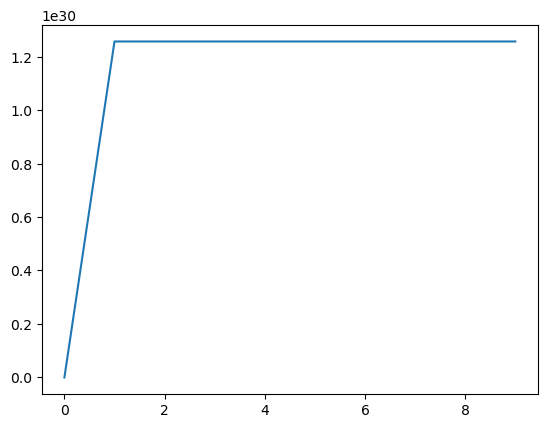

In [87]:
sns.lineplot(cost_history[:10])